<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.509964,21.625424,39.829645,0.024230,135.989263,135.953212,0.036051
1,0.0,1.0,87.121375,29.295816,27.288255,0.024871,153.730318,153.687769,0.042549
2,0.0,2.0,28.718305,36.368972,78.410260,0.023902,153.521438,153.500646,0.020792
3,0.0,3.0,59.827060,77.165774,65.490110,0.015383,212.498327,212.484938,0.013389
4,0.0,4.0,22.705780,62.296061,29.699813,-0.048454,124.653200,124.714658,-0.061458
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,74.370391,59.462638,81.983108,0.007530,225.823667,225.826987,-0.003320
19996,999.0,16.0,88.554546,98.924409,77.325409,0.010927,274.815291,274.827649,-0.012358
19997,999.0,17.0,35.758863,48.385857,81.992483,0.050159,176.187363,176.158210,0.029153
19998,999.0,18.0,48.623471,24.887891,52.931313,0.012621,136.455296,136.440045,0.015251


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.509964,21.625424,39.829645,0.024230,135.989263,135.953212,0.036051
1,0.0,1.0,87.121375,29.295816,27.288255,0.024871,153.730318,153.687769,0.042549
2,0.0,2.0,28.718305,36.368972,78.410260,0.023902,153.521438,153.500646,0.020792
3,0.0,3.0,59.827060,77.165774,65.490110,0.015383,212.498327,212.484938,0.013389
4,0.0,4.0,22.705780,62.296061,29.699813,-0.048454,124.653200,124.714658,-0.061458
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,74.370391,59.462638,81.983108,0.007530,225.823667,225.826987,-0.003320
19996,999.0,16.0,88.554546,98.924409,77.325409,0.010927,274.815291,274.827649,-0.012358
19997,999.0,17.0,35.758863,48.385857,81.992483,0.050159,176.187363,176.158210,0.029153
19998,999.0,18.0,48.623471,24.887891,52.931313,0.012621,136.455296,136.440045,0.015251


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    64.509964  21.625424  39.829645  ...  135.989263  135.953212  0.036051
      1.0    87.121375  29.295816  27.288255  ...  153.730318  153.687769  0.042549
      2.0    28.718305  36.368972  78.410260  ...  153.521438  153.500646  0.020792
      3.0    59.827060  77.165774  65.490110  ...  212.498327  212.484938  0.013389
      4.0    22.705780  62.296061  29.699813  ...  124.653200  124.714658 -0.061458
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   74.370391  59.462638  81.983108  ...  225.823667  225.826987 -0.003320
      16.0   88.554546  98.924409  77.325409  ...  274.815291  274.827649 -0.012358
      17.0   35.758863  48.385857  81.992483  ...  176.187363  176.158210  0.029153
      18.0   48.623471  24.887891  52.931313  ...  136.455296  136.440045  0.015251
      19.0   29.323632  42.431726  44.489310  ...  126.226639  126.256358 -0.029719

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    64.509964  21.625424  39.829645  ...  135.989263  135.953212  0.036051
      1.0    87.121375  29.295816  27.288255  ...  153.730318  153.687769  0.042549
      2.0    28.718305  36.368972  78.410260  ...  153.521438  153.500646  0.020792
      3.0    59.827060  77.165774  65.490110  ...  212.498327  212.484938  0.013389
      4.0    22.705780  62.296061  29.699813  ...  124.653200  124.714658 -0.061458
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   74.370391  59.462638  81.983108  ...  225.823667  225.826987 -0.003320
      16.0   88.554546  98.924409  77.325409  ...  274.815291  274.827649 -0.012358
      17.0   35.758863  48.385857  81.992483  ...  176.187363  176.158210  0.029153
      18.0   48.623471  24.887891  52.931313  ...  136.455296  136.440045  0.015251
      19.0   29.323632  42.431726  44.489310  ...  126.226639  126.256358 -0.029719

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.509964,21.625424,39.829645,0.024230,135.989263,135.953212,0.036051
1,0.0,1.0,87.121375,29.295816,27.288255,0.024871,153.730318,153.687769,0.042549
2,0.0,2.0,28.718305,36.368972,78.410260,0.023902,153.521438,153.500646,0.020792
3,0.0,3.0,59.827060,77.165774,65.490110,0.015383,212.498327,212.484938,0.013389
4,0.0,4.0,22.705780,62.296061,29.699813,-0.048454,124.653200,124.714658,-0.061458
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,74.370391,59.462638,81.983108,0.007530,225.823667,225.826987,-0.003320
19996,999.0,16.0,88.554546,98.924409,77.325409,0.010927,274.815291,274.827649,-0.012358
19997,999.0,17.0,35.758863,48.385857,81.992483,0.050159,176.187363,176.158210,0.029153
19998,999.0,18.0,48.623471,24.887891,52.931313,0.012621,136.455296,136.440045,0.015251


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    64.509964  21.625424  39.829645  ...  135.989263  135.953212  0.036051
      1.0    87.121375  29.295816  27.288255  ...  153.730318  153.687769  0.042549
      2.0    28.718305  36.368972  78.410260  ...  153.521438  153.500646  0.020792
      3.0    59.827060  77.165774  65.490110  ...  212.498327  212.484938  0.013389
      4.0    22.705780  62.296061  29.699813  ...  124.653200  124.714658 -0.061458
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   74.370391  59.462638  81.983108  ...  225.823667  225.826987 -0.003320
      16.0   88.554546  98.924409  77.325409  ...  274.815291  274.827649 -0.012358
      17.0   35.758863  48.385857  81.992483  ...  176.187363  176.158210  0.029153
      18.0   48.623471  24.887891  52.931313  ...  136.455296  136.440045  0.015251
      19.0   29.323632  42.431726  44.489310  ...  126.226639  126.256358 -0.029719

[20000 rows x 7 columns]

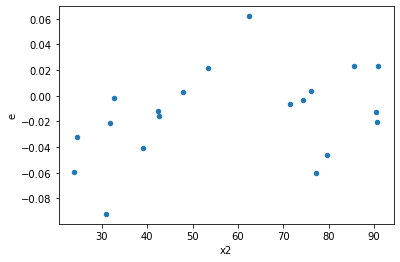

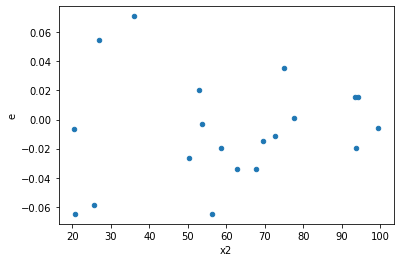

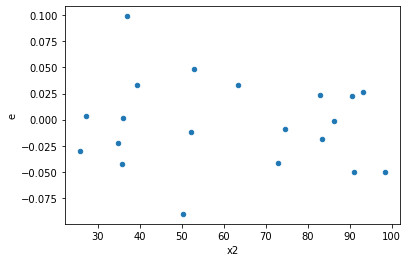

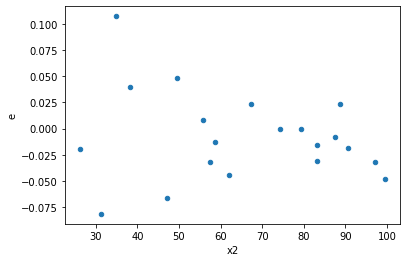

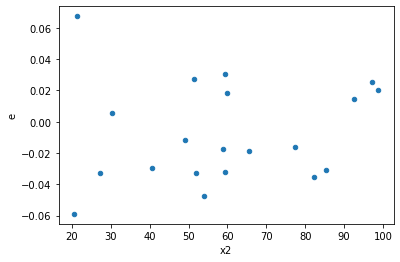

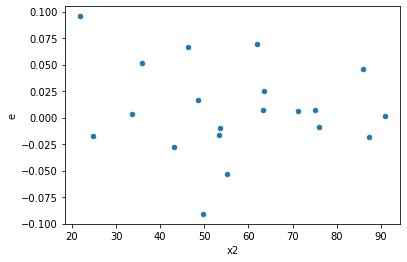

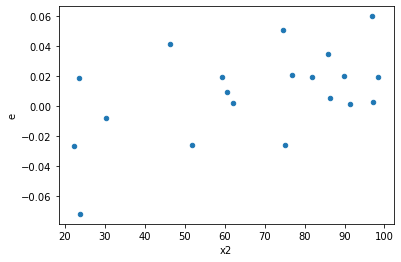

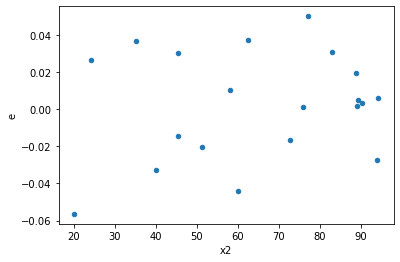

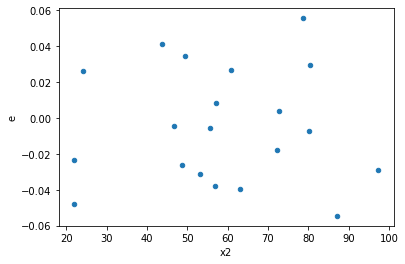

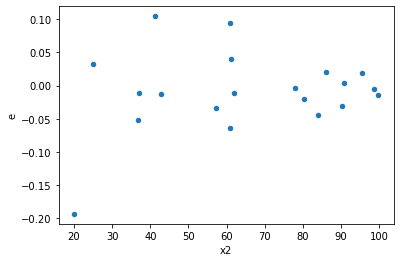

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,5.0,5.0,0.002943526332466676,0.005559123476131334,0.0005887052664933351,0.0011118246952262667,1.888593084700821,0.5021206204987025,0.7489396897506487,0.25106031024935127,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.003904666521857701,0.004166745452597635,0.0007809333043715402,0.000833349090519527,1.0671194144936216,0.9449062307565106,0.5275468846217447,0.4724531153782553,Reject005=1 : Homoscedasticity
20.0,5.0,5.0,0.004200213834662024,0.005192828932855655,0.0008400427669324048,0.001038565786571131,1.2363248961284141,0.8215996207128005,0.5892001896435998,0.41079981035640023,Reject005=1 : Homoscedasticity
21.0,5.0,5.0,0.0016523133869849173,0.0030125560373923466,0.00033046267739698346,0.0006025112074784693,1.8232352658532602,0.525750409872471,0.7371247950637645,0.2628752049362355,Reject005=1 : Homoscedasticity
24.0,5.0,5.0,0.010001297393850177,0.01029162980553664,0.0020002594787700357,0.002058325961107328,1.029029474902425,0.9757140425239381,0.5121429787380309,0.48785702126196906,Reject005=1 : Homoscedasticity
29.0,5.0,5.0,0.003547635951945861,0.004958408589718492,0.0007095271903891723,0.0009916817179436983,1.3976655600749643,0.7222918908232052,0.6388540545883974,0.3611459454116026,Reject005=1 : Homoscedasticity
33.0,5.0,5.0,0.0028035949455316204,0.004818296264718894,0.0005607189891063241,0.0009636592529437788,1.7186135509333516,0.5667692251594865,0.7166153874202568,0.28338461257974323,Reject005=1 : Homoscedasticity
40.0,5.0,5.0,0.001958971460204753,0.0038365194050033248,0.0003917942920409506,0.000767303881000665,1.9584355785368763,0.47841791893685714,0.7607910405315714,0.23920895946842857,Reject005=1 : Homoscedasticity
44.0,5.0,5.0,0.004899162388404272,0.006152409587926546,0.0009798324776808544,0.0012304819175853092,1.2558084627871409,0.8087217710837766,0.5956391144581117,0.4043608855418883,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.02099868941187908,0.0022052408755110484,0.004199737882375816,0.0004410481751022097,0.105018024327915,0.027229938608370356,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,0.005427475637200571,0.0009102518062662572,0.0010854951274401141,0.00018205036125325144,0.1677118180001181,0.07223944917357479,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,0.00971250977948702,0.0017443909894741304,0.0019425019558974039,0.00034887819789482607,0.1796024950377206,0.08273340542360466,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,0.031041601849828983,0.001704864661597398,0.0062083203699657965,0.0003409729323194796,0.05492192928203512,0.0063485801915694065,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,0.011942665725329126,0.005980761543549433,0.002388533145065825,0.0011961523087098867,0.5007894955030746,0.46602093555767526,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,0.002943526332466676,0.005559123476131334,0.0005887052664933351,0.0011118246952262667,1.888593084700821,0.5021206204987025,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,0.012580959705812002,0.002075965578742421,0.0025161919411624003,0.0004151931157484842,0.165008522981231,0.06993127173981364,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.003904666521857701,0.004166745452597635,0.0007809333043715402,0.000833349090519527,1.0671194144936216,0.9449062307565106,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,0.032175257766233846,0.0013031426375131599,0.006435051553246769,0.00026062852750263196,0.04050138920349959,0.0031134355941340747,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      696
Reject005=0 : Heteroscedasticity    304
Name: Result_test, dtype: int64